In [14]:
import pyAgrum as gum

# Create a Bayesian network
bn = gum.BayesNet('Wet Grass')

# Define the variables
Rain = bn.add(gum.LabelizedVariable('Rain', 'Rain', ["No", "Yes"]))
Sprinkler = bn.add(gum.LabelizedVariable('Sprinkler', 'Sprinkler', 2))
GrassWet = bn.add(gum.LabelizedVariable('GrassWet', 'Wet Grass', 2))


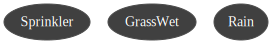

In [15]:
import pyAgrum.lib.notebook as gnb
gnb.showBN(bn)

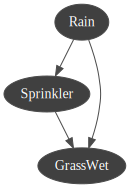

In [16]:
# Define the edges
bn.addArc(Rain, Sprinkler)
bn.addArc(Rain, GrassWet)
bn.addArc(Sprinkler, GrassWet)
gnb.showBN(bn)

In [17]:
# Unconditional probability:
bn.cpt(Rain).fillWith([0.8, 0.2])

# Sprinkler mostly doesn't turn on in the rain
bn.cpt(Sprinkler)[{'Rain': 'No'}] = [0.5, 0.5]
bn.cpt(Sprinkler)[{'Rain': 'Yes'}] = [0.95, 0.05]

# The grass is wet if it rained, or if the sprinkler turned on (although once in a while the sprinkler doesn't work)
bn.cpt(GrassWet)[{'Rain': 'No', 'Sprinkler': 0}] = [1.0, 0.0]
bn.cpt(GrassWet)[{'Rain': 'No', 'Sprinkler': 1}] = [0.02, 0.98]
bn.cpt(GrassWet)[{'Rain': 'Yes', 'Sprinkler': 0}] = [0.0, 1.0]
bn.cpt(GrassWet)[{'Rain': 'Yes', 'Sprinkler': 1}] = [0.0, 1.0]

In [18]:
bn.cpt(GrassWet)

(pyAgrum.Potential<double>@0x60000211c900) 
             ||  GrassWet         |
Rain  |Sprink||0        |1        |
------|------||---------|---------|
No    |0     || 1.0000  | 0.0000  |
Yes   |0     || 0.0000  | 1.0000  |
No    |1     || 0.0200  | 0.9800  |
Yes   |1     || 0.0000  | 1.0000  |

In [19]:
gnb.sideBySide(bn.cpt(Rain), bn.cpt(Sprinkler), bn.cpt(GrassWet))

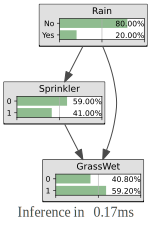

In [20]:
# We can compute all posteriors:
gnb.showInference(bn)

In [21]:
# Or just one posterior, if we want to do some further processing

inference_engine = gum.LazyPropagation(bn)
inference_engine.posterior(GrassWet)

(pyAgrum.Potential<double>@0x600002146b20) 
  GrassWet         |
0        |1        |
---------|---------|
 0.4080  | 0.5920  |

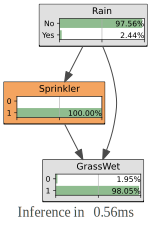

In [22]:
# We can also use Bayes' rule to update the posteriors. Let's say we observe the sprinkler turning on:
gnb.showInference(bn, evs={'Sprinkler': 1})

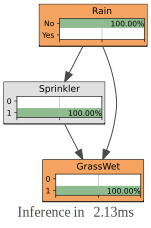

In [28]:
# Or combine several pieces of evidence:
gnb.showInference(bn, evs={'Rain': 0, 'GrassWet': 1})